In [286]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_file_pd = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_file_pd.head()
clinical_trial_file_pd = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_file_pd.head()

# Combine the data into a single dataset
merge_table = pd.merge(clinical_trial_file_pd, mouse_drug_file_pd, on="Mouse ID", how="outer")
merge_table

# Display the data table for preview
merge_table.head()
merge_table_df = pd.DataFrame(merge_table)
merge_table_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [287]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_time = merge_table_df.groupby(['Drug','Timepoint'])
#grouped_drug_time.transform('mean')
df3=grouped_drug_time.aggregate(np.mean)
# Convert to DataFrame
drug_time_df = pd.DataFrame(df3)
drug_time_df.drop('Metastatic Sites', axis=1, inplace=True)
drug_time_df
#df4=df3.sem()
#df4
#grouped_drug_time
#grouped_drug_time_df.get_group('Capomulin')
#df_mean = grouped_drug_time_df.mean()
#df_mean
# Convert to DataFrame
#drug_time = pd.DataFrame(df4)
# Preview DataFrame
#drug_time
#drug_time_pivot_df=pd.pivot_table(drug_time_df, index=['Timepoint'],columns='Drug', aggfunc='mean')
#drug_time_pivot_df['Period'] = drug_time_pivot_df.index
#final_df = pd.DataFrame(drug_time_pivot_df)
#final_df
#plt.plot(final_df.Period,final_df['Tumor Volume (mm3)'])
#plt.show()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [288]:
drug_time_pivot_df=pd.pivot_table(drug_time_df, index=['Timepoint'],columns='Drug', aggfunc='mean')
drug_time_pivot_df['Period'] = drug_time_pivot_df.index
final_df = pd.DataFrame(drug_time_pivot_df)
final_df


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                 Period  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol         
Timepoint                                                                
0          45.000000  45.000000  45.000000  45.000000  45.000000      0  
5          47.125589  47.248967  43.944859  47.527452  46.851818      5  
10         49.423329  49.101541  42.531957  49.463844  48.689881     10  
15         51.359742  51.067318  41.495061  51.529409  50.779059     15  
20         54.364417  53.346737  40.238325  54.067395  53.170334     20  
25         57.482574  55.504138  38.974300  56.166123  55.432935     25  
30         59.809063  58.196374  38.703137  59.826738  57.713531     30  
35         62.420615  60.350199  37.451996  62.440699  60.089372     35  
40         65.052675  63.045537  36.574081  65.356386  62.916692     40  
45         68.084082  66.258529  34.955595  68.438310  65.960888     45

In [289]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df5=grouped_drug_time.mean()
# Convert to DataFrame
drug_time_sem_df = pd.DataFrame(df5)
drug_time_sem_df.drop('Tumor Volume (mm3)', axis=1, inplace=True)
drug_time_sem_df
#df4=drug_time_sem_df.sem()
#df4



# Convert to DataFrame

# Preview DataFrame



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [290]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


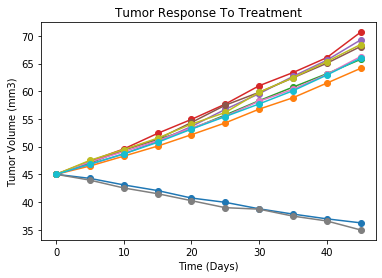

In [295]:
# Generate the Plot (with Error Bars)

# Save the Figure
plt.plot(final_df.Period,final_df['Tumor Volume (mm3)'], marker="o")
plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
#plt.legend( HANDLE, loc="best")
plt.show()



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)